[View in Colaboratory](https://colab.research.google.com/github/trallen91/D-Sigh/blob/master/Project_Part_2.ipynb)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive/data
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install easydict
# !pip install tensorflow
!pip install tensorboard_logger
!pip install -q keras
import torch
import os
import numpy as np
from scipy.sparse import rand as sprand
from scipy.sparse import lil_matrix
from torch.autograd import Variable
import pandas as pd
CUDA_AVAILABLE = torch.cuda.is_available()
if CUDA_AVAILABLE:
  gpus=[0]
  torch.cuda.set_device(gpus[0])
FloatTensor = torch.cuda.FloatTensor if CUDA_AVAILABLE else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if CUDA_AVAILABLE else torch.LongTensor


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.
ls: cannot access 'drive/data': No such file or directory
Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
  Running setup.py bdist_wheel for easydict ... - done
  Stored in directory: /content/.cache/pip/wheels/58/40/dd/87bc05b3d56641ccb8f099babf6ff5faed5db5c03c5d837450
Successful

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

from google.colab import files
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# 1) Preprocessing Data

#### Load Data

In [5]:
uploaded = files.upload()


#store dataset on google serve as breast_cancer.csv

with open("breast_cancer.csv", 'w') as f:
    f.write(uploaded[(list(uploaded.keys())[0])].decode("utf-8"))

Saving data.txt to data.txt


In [0]:
breast_cancer_data = pd.read_csv('breast_cancer.csv', header=None, names=['id','target','mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error','concavity error',
 'concave points error', 'symmetry error' ,'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness' ,'worst concavity',
 'worst concave points' ,'worst symmetry', 'worst fractal dimension'])

In [0]:
feature_names = np.array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'])

In [9]:
breast_cancer_data.head()

,id,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Check for null values & drop ID column

In [10]:
print(breast_cancer_data.isnull().values.any())

breast_cancer_data.drop('id',axis=1,inplace=True)

False


In [11]:
for x in breast_cancer_data.head(0):
    print (x)

target
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


#### Convert M and B labels into binary 1 and 0, respectively

In [0]:
breast_cancer_data['target'] = breast_cancer_data['target'].map({'M':1,'B':0})

In [0]:
y = breast_cancer_data['target']

In [0]:
# y = np.ravel(breast_cancer_data['target'])

In [0]:
breast_cancer_data.drop('target',axis=1,inplace=True)

In [16]:
len(breast_cancer_data.columns)

30

#### Standardize data

In [0]:
X = pd.DataFrame(preprocessing.scale(breast_cancer_data))
X.columns = list(breast_cancer_data.columns)

In [18]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Split the dataset in train and test at a ratio of 80% to 20% respectively:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# 2) Train Models and Evaluate Performance

### k-Nearest Neighbors

In [0]:
def knn(X_train,y_train):
    best_cv_score = 0
    best_cv_k = 0
    model = None 
    for k in range(1,25):
        knn_cv = KNeighborsClassifier(n_neighbors=k)
        scores_cv = cross_val_score(knn_cv, X_train, y_train, scoring='accuracy',cv=10)
        mean_scores_cv = scores_cv.mean()*100

#         print('Mean accuracy with 10-fold cross-validation is %s' % round(mean_scores_cv,2),' k=',k)

        if mean_scores_cv > best_cv_score:
            best_cv_score = mean_scores_cv
            best_cv_k = k
            model_knn = knn_cv
        model_knn.fit(X_train,y_train)
    return model_knn
#     knn_accuracy = model_knn.score(X_test,y_test)

#     return 'knn accuracy ',knn_accuracy

### Support Vector Machine

In [0]:
def svm(X_train,y_train):
    svm_model = SVC()
    svm_model.fit(X_train, y_train) 
    return svm_model
#     svm_score = svm_model.score(X_test, y_test)
#     return 'svm accuracy ',svm_score

### Logistic Regression

In [0]:
def lr(X_train,y_train):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print('lr-cross-val-score: '+str(scores))
    return lr
#     return ("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

### Random Forest

In [0]:
def rf(X_train,y_train):
    rf = RandomForestRegressor(n_estimators = 2000, random_state=0)

    rf.fit(X_train,y_train)
    return rf
#     rf_preds = rf.predict(X_test)
#     rf_accuracy = rf.score(X_test,y_test)
#     return('rf_accuracy ',rf_accuracy)

### SCORE

In [0]:
def score(model,X_test,y_test):
    return model.score(X_test,y_test)

### 

# 3) Feature Selection

In [0]:
malignant = X_train.loc[y_train == 1]

In [0]:
benign = X_train.loc[y_train == 0]

In [0]:
malignant_stats = malignant.describe()

In [0]:
benign_stats = benign.describe()

In [30]:
benign_stats.loc['min',]

mean radius               -1.827998
mean texture              -2.229249
mean perimeter            -1.814389
mean area                 -1.377937
mean smoothness           -3.112085
mean compactness          -1.610136
mean concavity            -1.114873
mean concave points       -1.261820
mean symmetry             -2.353466
mean fractal dimension    -1.551938
radius error              -1.059924
texture error             -1.554264
perimeter error           -1.044049
area error                -0.737829
smoothness error          -1.776065
compactness error         -1.298098
concavity error           -1.057501
concave points error      -1.913447
symmetry error            -1.332263
fractal dimension error   -1.096968
worst radius              -1.572003
worst texture             -2.223994
worst perimeter           -1.571835
worst area                -1.154919
worst smoothness          -2.682695
worst compactness         -1.443878
worst concavity           -1.305831
worst concave points      -1

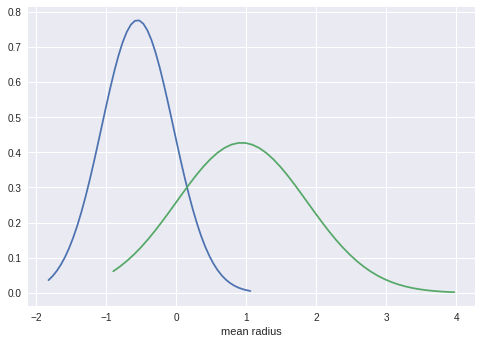

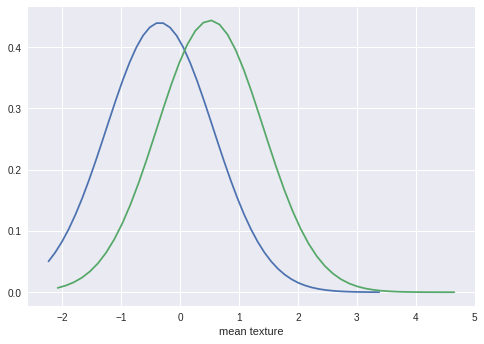

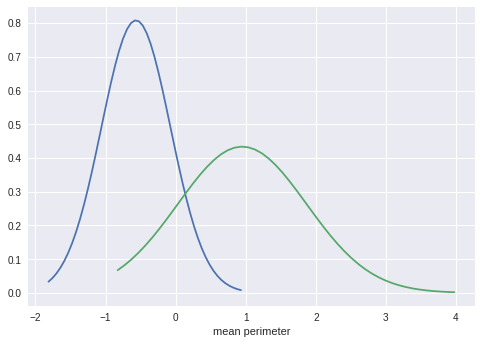

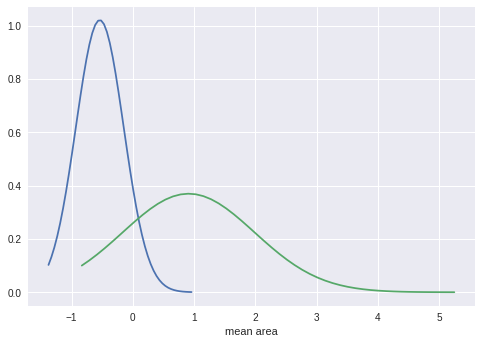

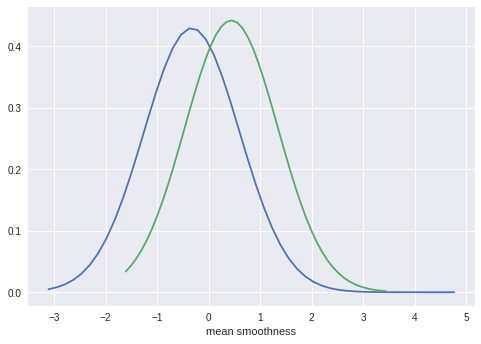

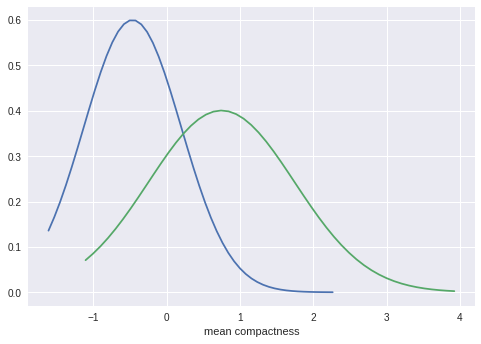

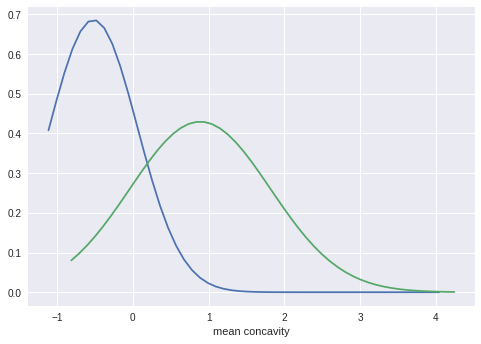

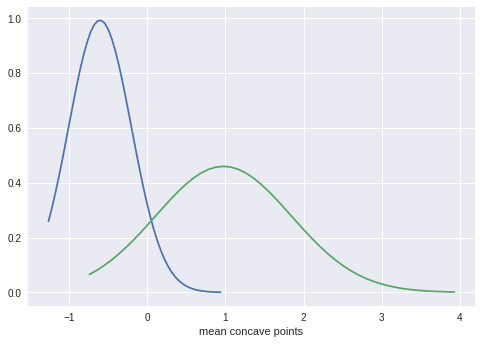

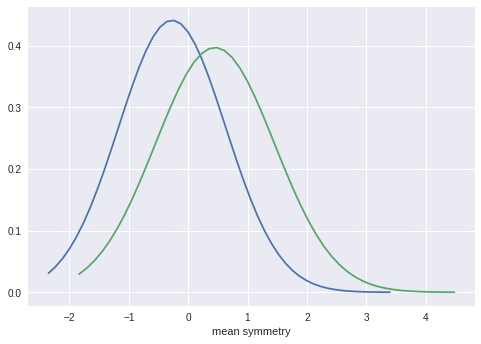

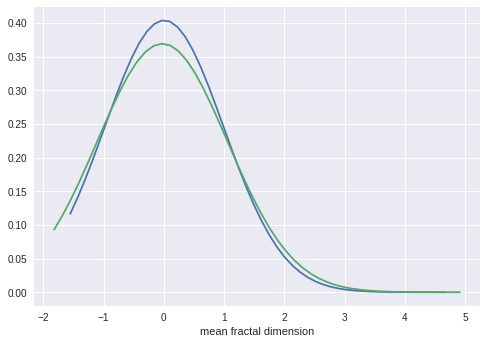

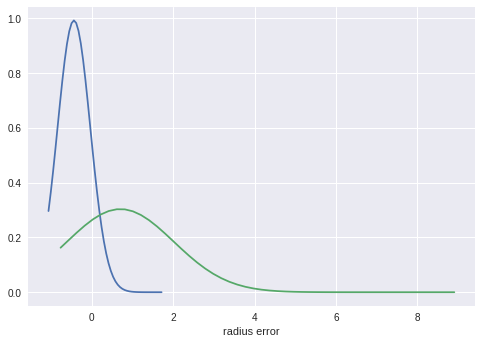

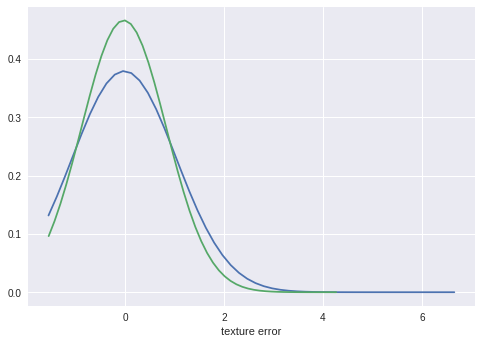

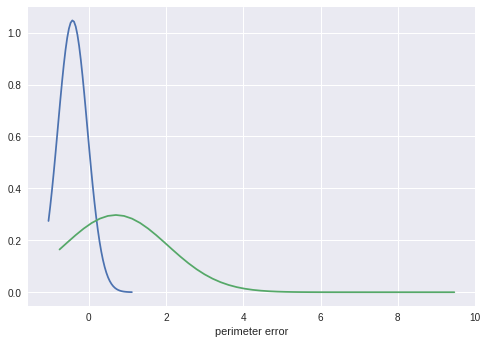

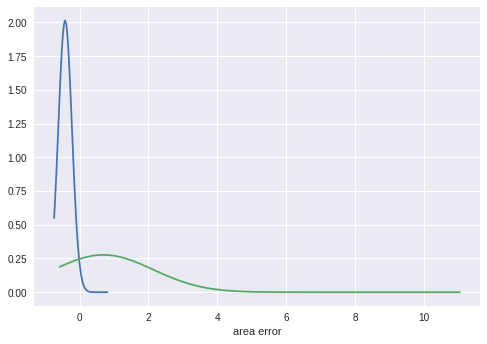

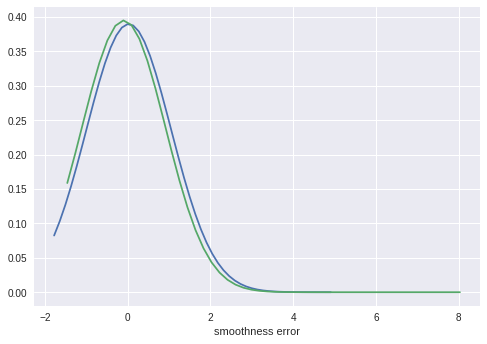

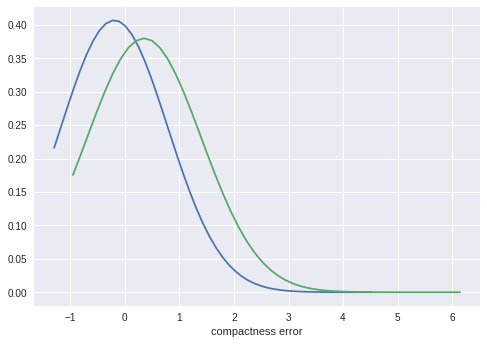

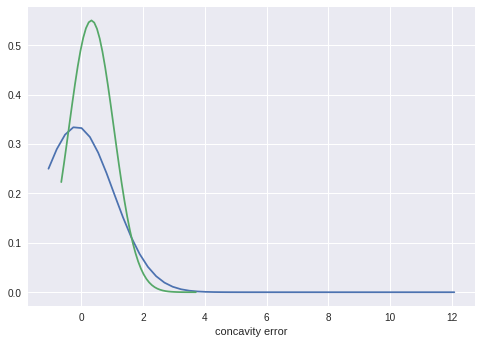

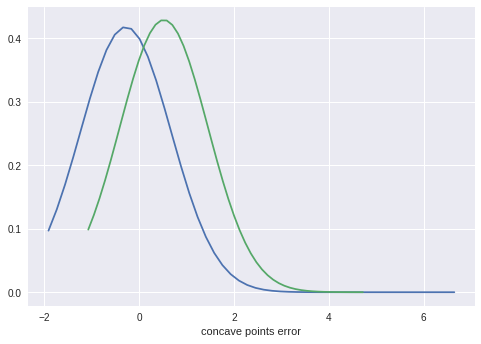

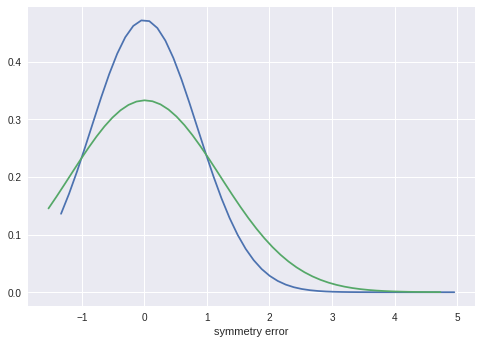

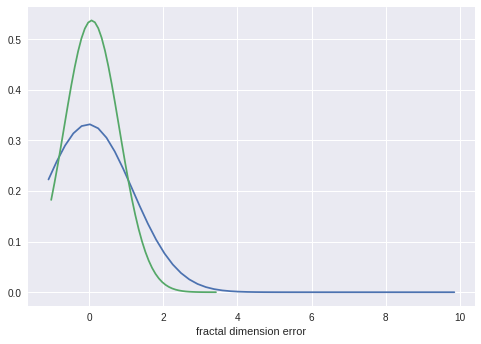

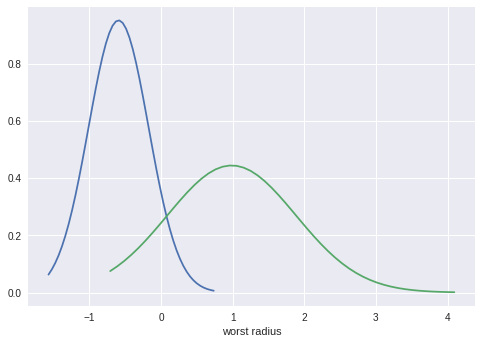

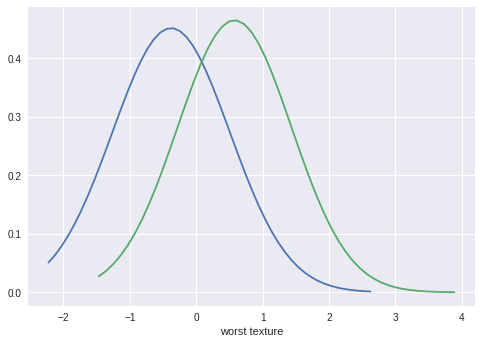

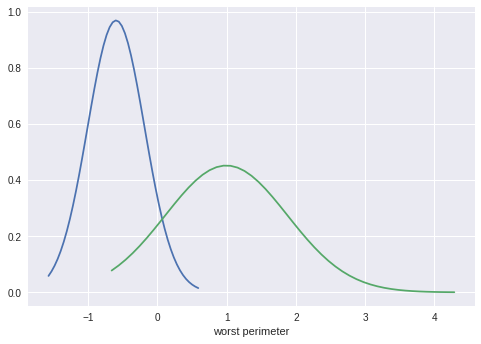

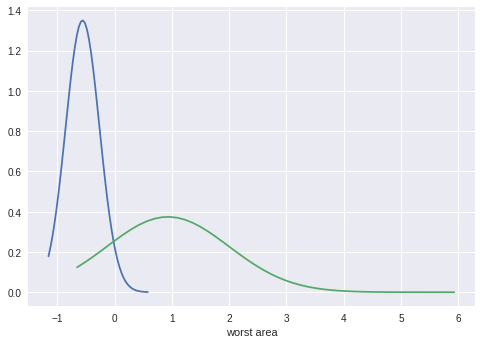

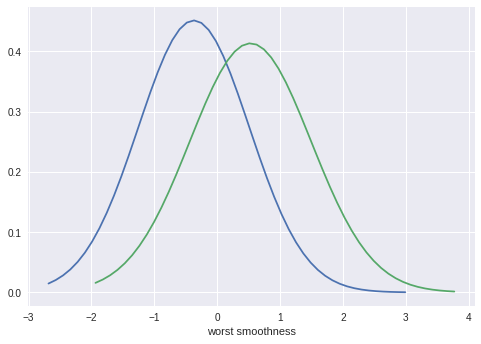

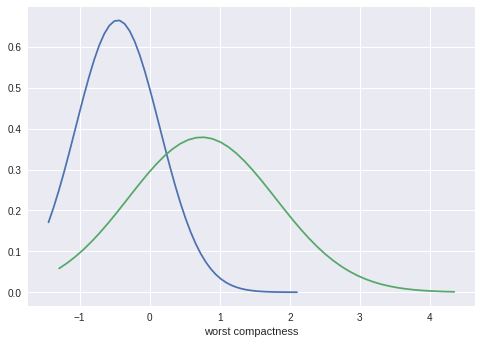

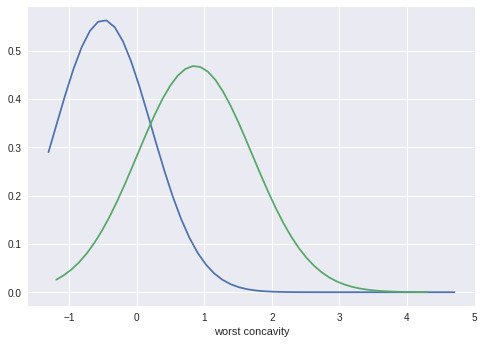

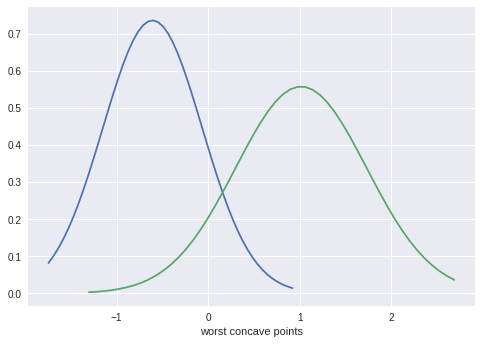

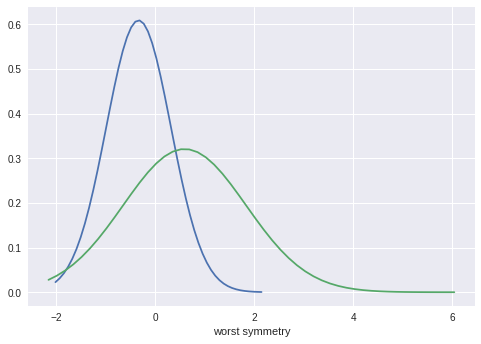

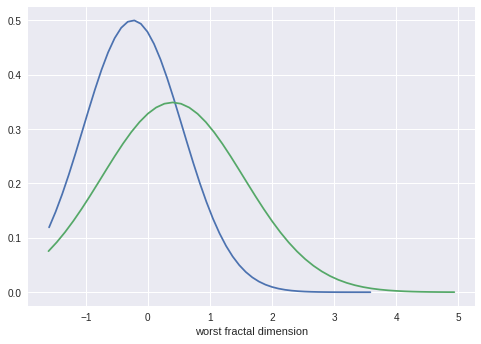

In [31]:
for p in feature_names:
    x_b = np.linspace(benign_stats.loc['min',p],benign_stats.loc['max',p])
    plt.plot(x_b,stats.norm.pdf(x=x_b,loc=benign_stats.loc['mean',p],scale=benign_stats.loc['std',p]))
    
    x_m = np.linspace(malignant_stats.loc['min',p],malignant_stats.loc['max',p])
    plt.plot(x_m,stats.norm.pdf(x=x_m,loc=malignant_stats.loc['mean',p],scale=malignant_stats.loc['std',p]))

#     plt.plot(data_benign[p],stats.norm.pdf(x=data_benign[p],loc=benign_stats.loc['mean',p],scale=benign_stats.loc['std',p]))

#     plt.plot(data_malignant[p],stats.norm.pdf(x=data_malignant[p],loc=malignant_stats.loc['mean',p],scale=malignant_stats.loc['std',p]))
    plt.xlabel(p)
    plt.show()
#     if p == 'mean fractal dimension': 
#         plt.xlabel('Figure 4: '+p)
    
#         plt.savefig('bad.png')
#     if p == 'worst radius': 
#         plt.xlabel('Figure 3: '+p)
# #         plt.savefig('good.png')
#     plt.show()
    

In [32]:
X_train.corrwith(y_train)

mean radius                0.718073
mean texture               0.416213
mean perimeter             0.731859
mean area                  0.695171
mean smoothness            0.375137
mean compactness           0.590554
mean concavity             0.683262
mean concave points        0.778115
mean symmetry              0.348123
mean fractal dimension    -0.014308
radius error               0.540126
texture error             -0.003226
perimeter error            0.529211
area error                 0.517064
smoothness error          -0.058123
compactness error          0.254370
concavity error            0.216047
concave points error       0.380240
symmetry error             0.004723
fractal dimension error    0.041727
worst radius               0.766527
worst texture              0.467479
worst perimeter            0.774998
worst area                 0.722875
worst smoothness           0.430364
worst compactness          0.588884
worst concavity            0.649952
worst concave points       0

In [0]:
sns.set(color_codes=True)

In [0]:
# # for x in range(1,30,1):
# for x in feature_names:
#     print(x)
#     test1 = benign[x]
#     test2 = malignant[x]
    
#     upper = max(max(test1),max(test2))
    
#     bins = np.linspace(0, upper, 100)

#     plt.hist(test1, bins, alpha=0.5, label='benign')
#     plt.hist(test2, bins, alpha=0.5, label='malignant')
#     plt.legend(loc='upper right')
#     plt.show()

In [0]:
import seaborn as sns

In [37]:
type(y_train)

pandas.core.series.Series

In [0]:
swarmplot_data = X_train.copy(deep=True)

In [0]:
swarmplot_data['target'] = y_train

In [40]:
swarmplot_data.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,...,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149,0
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,0.583433,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251,0
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296,-1.470464,-1.023849,-1.100607,-1.108494,-1.281175,...,-0.818652,-0.381891,-0.344521,-2.047074,-1.297121,-1.120358,-1.237560,-0.716282,-1.260478,0
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015,0.169787,0.298817,0.405245,-0.520693,0.374586,...,0.834212,0.197742,-0.019835,1.268234,0.652266,0.646282,1.036837,0.450138,1.194443,1
102,-0.553058,0.286311,-0.607516,-0.557982,-1.155035,-1.212155,-0.815688,-0.805266,-0.265127,-0.854476,...,1.166414,-0.675579,-0.585004,-0.879725,-1.053734,-0.756514,-0.613574,-0.334485,-0.840426,0


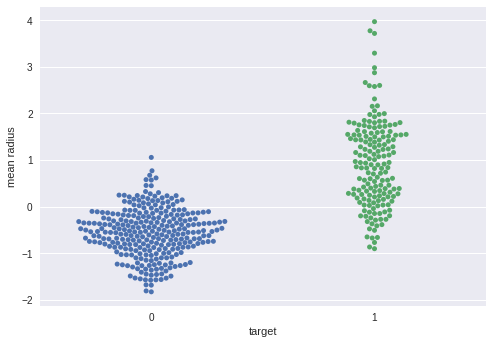

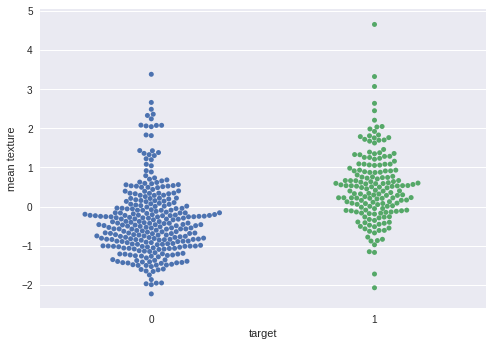

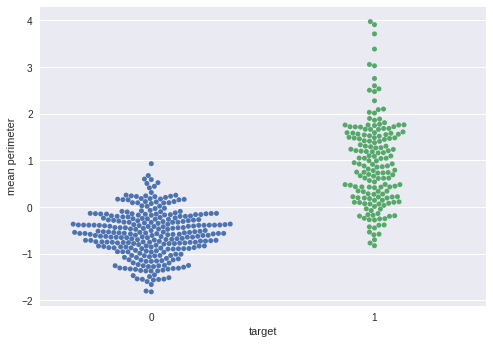

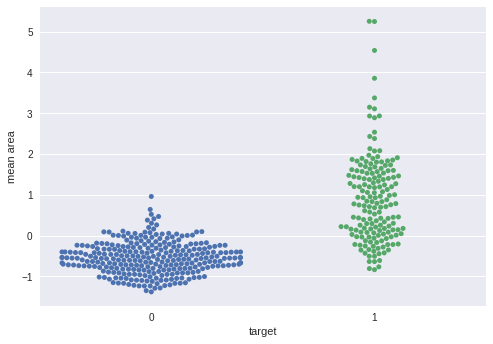

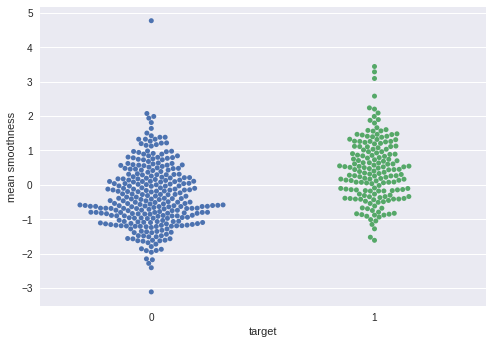

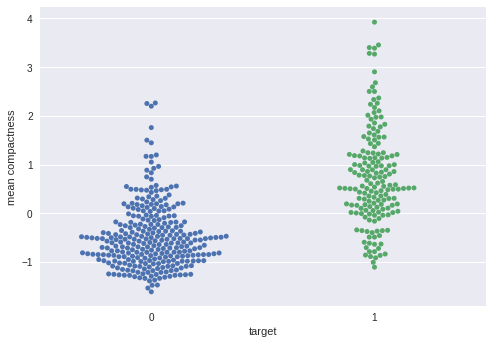

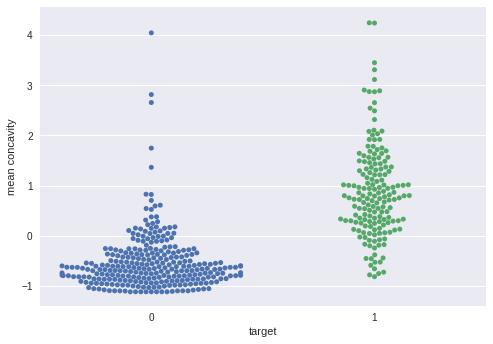

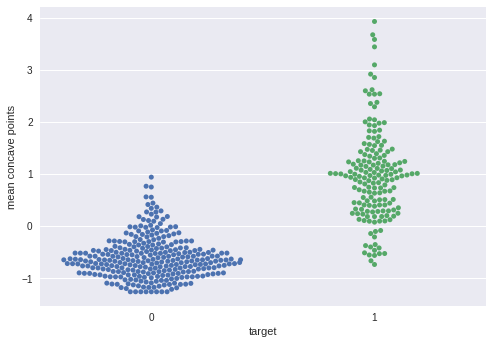

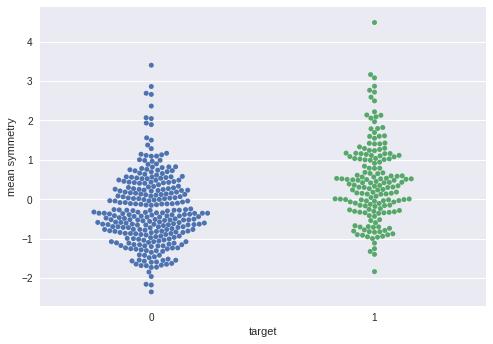

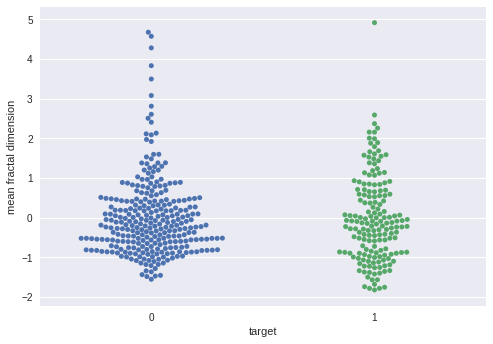

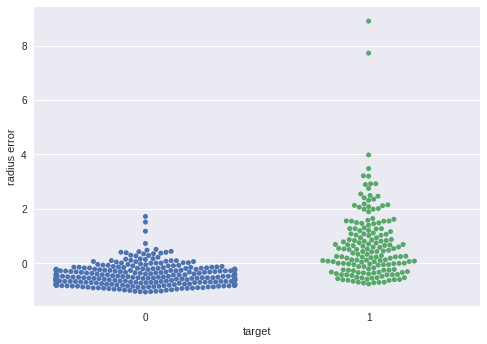

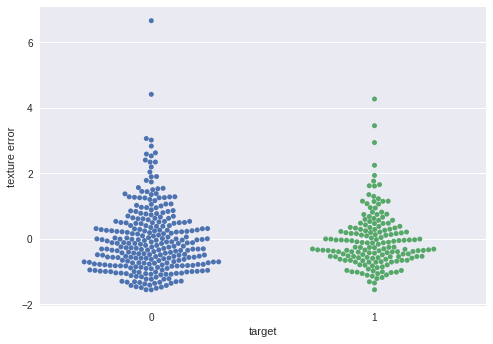

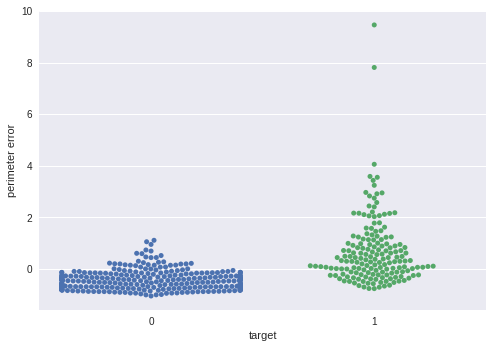

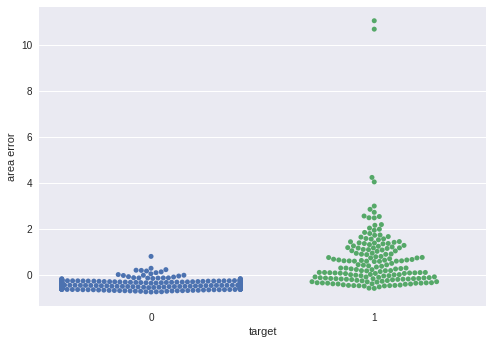

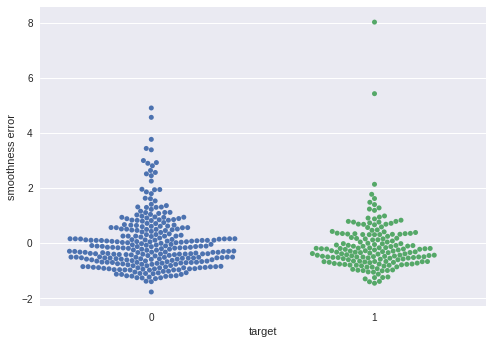

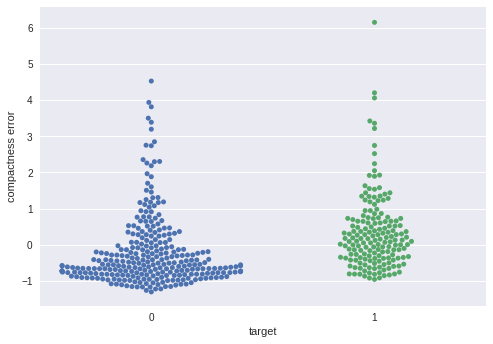

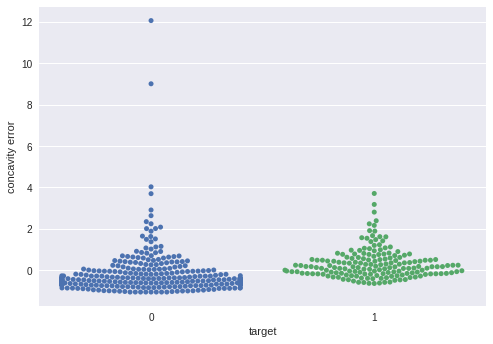

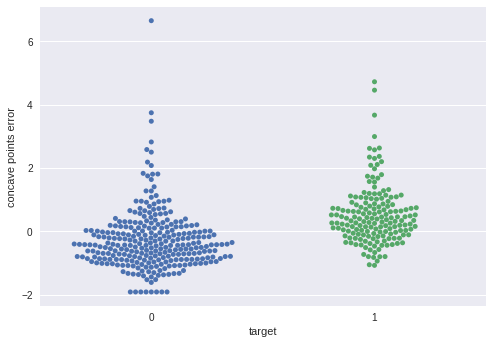

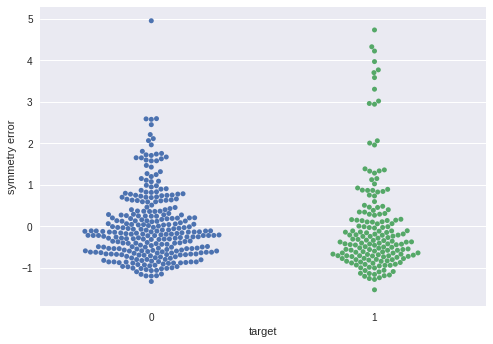

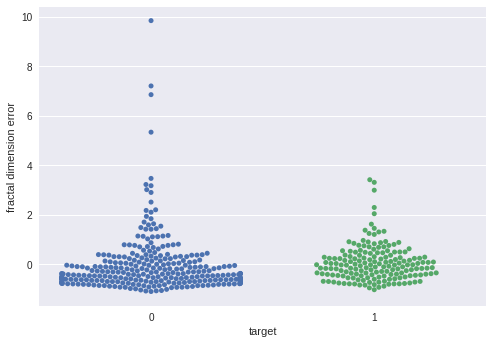

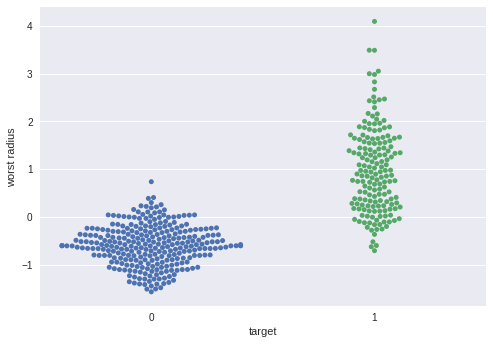

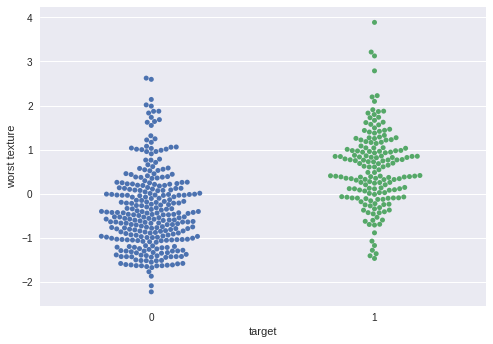

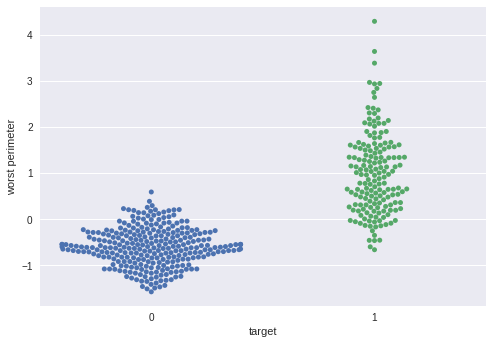

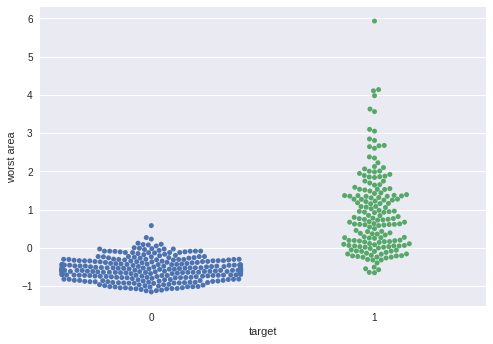

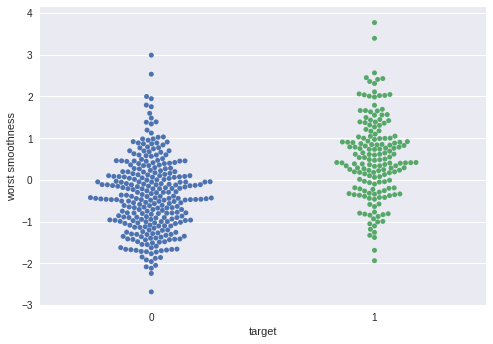

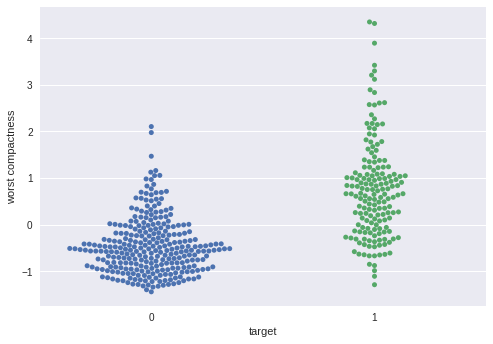

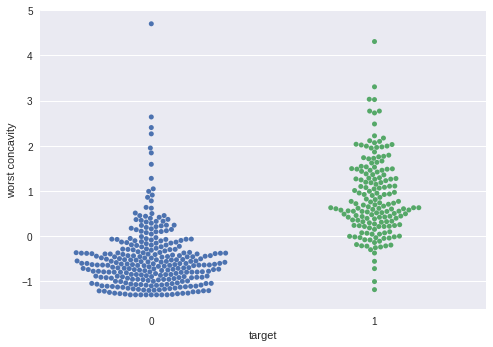

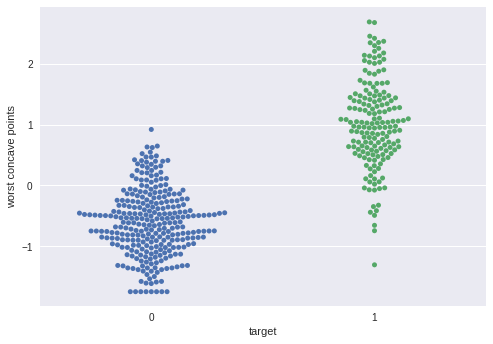

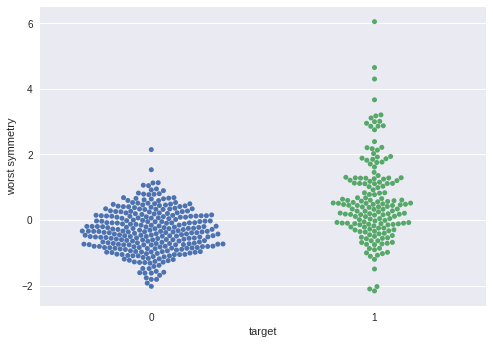

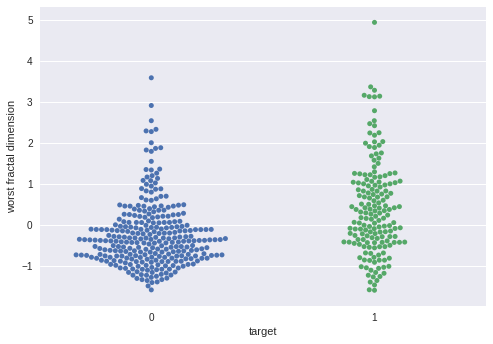

In [41]:
for fn in feature_names:
    _ = sns.swarmplot(y=fn, x='target', data=swarmplot_data)
    plt.show()

# Evaluate Models

In [33]:
print(X_train.shape)


(455, 30)


In [34]:
for model in [lr,knn,svm,rf]:
    m = model(X_train,y_train)
#     print(str(model)+' accuracy-score: '+str(score(m,X_test,y_test)))
    print(str(model)+' accuracy-score: '+str(score(m,X_test,y_test)))

lr-cross-val-score: 0.9756960913482653
<function lr at 0x7fd2354c3950> accuracy-score: 0.9736842105263158
<function knn at 0x7fd23554aae8> accuracy-score: 0.9473684210526315
<function svm at 0x7fd23554ad90> accuracy-score: 0.9736842105263158
<function rf at 0x7fd23554ad08> accuracy-score: 0.8584974533245987


## Feature Selection

### lr, knn, svm

In [0]:
drop_set = ['mean fractal dimension','texture error','mean smoothness', 'mean symmetry', 'smoothness error', 'compactness error']

In [37]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
keep_set = [a for a in feature_names if a not in drop_set]

In [0]:
X_train_keep = X_train.loc[:,keep_set]
X_test_keep = X_test.loc[:,keep_set]

In [40]:
for model in [lr,knn,svm,rf]:
    m = model(X_train_keep,y_train)
    print(str(model)+' accuracy-score: '+str(score(m,X_test_keep,y_test)))

lr-cross-val-score: 0.9712011418533157
<function lr at 0x7fd2354c3950> accuracy-score: 0.9824561403508771
<function knn at 0x7fd23554aae8> accuracy-score: 0.956140350877193
<function svm at 0x7fd23554ad90> accuracy-score: 0.9824561403508771
<function rf at 0x7fd23554ad08> accuracy-score: 0.8580218123157549


In [0]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
features_pca = pca.transform(X_train)

features_test_pca = pca.transform(X_test)

In [66]:
for model in [lr,knn,svm,rf]:
    m = model(features_pca,y_train)
    print(str(model)+' accuracy-score: '+str(score(m,features_test_pca,y_test)))

lr-cross-val-score: 0.9756960913482653
<function lr at 0x7fc4e5581730> accuracy-score: 0.9736842105263158
<function knn at 0x7fc4e55810d0> accuracy-score: 0.9473684210526315
<function svm at 0x7fc4ec5af158> accuracy-score: 0.9736842105263158
<function rf at 0x7fc4e5581950> accuracy-score: 0.842694852112676


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# run an LDA and use it to transform the features
X_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda = lda.transform(X_test)

In [72]:
X_test_lda.shape

(114, 1)

In [69]:
for model in [lr,knn,svm,rf]:
    m = model(X_lda,y_train)
    print(str(model)+' accuracy-score: '+str(score(m,X_test_lda,y_test)))

lr-cross-val-score: 0.9802393500219587
<function lr at 0x7fc4e5581730> accuracy-score: 0.9385964912280702
<function knn at 0x7fc4e55810d0> accuracy-score: 0.9385964912280702
<function svm at 0x7fc4ec5af158> accuracy-score: 0.9385964912280702
<function rf at 0x7fc4e5581950> accuracy-score: 0.7975257874222077


In [84]:
rf.feature_importances_

array([0.00182496, 0.02151312, 0.00291364, 0.00575214, 0.00312812,
       0.00174569, 0.00394124, 0.24923167, 0.00280432, 0.00255603,
       0.0061406 , 0.00425057, 0.00303944, 0.01150167, 0.00299143,
       0.0019534 , 0.0057213 , 0.0022765 , 0.00252527, 0.0056544 ,
       0.07871638, 0.02540831, 0.14743445, 0.10505789, 0.00847295,
       0.00221604, 0.01438857, 0.26995708, 0.00407536, 0.00280748])

### Random Forest

In [0]:
rf = rf(X_train,y_train)

In [0]:
importance_mean = rf.feature_importances_.mean()

In [0]:
importance_mean

0.03333333333333334

In [0]:
keep_set = []

In [0]:
for feature in range(len(rf.feature_importances_)):
    if rf.feature_importances_[feature] > importance_mean:
        print(feature)
        keep_set.append(feature)

7
20
22
23
27


In [0]:
keep_set

[7, 20, 22, 23, 27]

In [0]:
rf_f_select = rf(X_train.iloc[:,keep_set],y_train)

In [0]:
rf_f_select_accuracy = score(rf_f_select,X_test.iloc[:,keep_set], y_test)

In [0]:
rf_f_select_accuracy

0.8859469550651

# NN

In [0]:
nn_classifier = Sequential()

nn_classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 30))

nn_classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu'))

nn_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

nn_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [86]:
nn_classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000)

Epoch 1/1000
455/455 [==============================] - 0s 491us/step - loss: 0.6748 - acc: 0.7934
Epoch 2/1000
455/455 [==============================] - 0s 139us/step - loss: 0.4561 - acc: 0.9297
Epoch 3/1000
455/455 [==============================] - 0s 138us/step - loss: 0.1922 - acc: 0.9429
Epoch 4/1000
455/455 [==============================] - 0s 144us/step - loss: 0.1183 - acc: 0.9648
Epoch 5/1000
455/455 [==============================] - 0s 140us/step - loss: 0.0922 - acc: 0.9736
Epoch 6/1000
455/455 [==============================] - 0s 173us/step - loss: 0.0795 - acc: 0.9824
Epoch 7/1000
455/455 [==============================] - 0s 142us/step - loss: 0.0718 - acc: 0.9846
Epoch 8/1000
455/455 [==============================] - 0s 164us/step - loss: 0.0667 - acc: 0.9824
Epoch 9/1000
455/455 [==============================] - 0s 140us/step - loss: 0.0621 - acc: 0.9846
Epoch 10/1000
455/455 [==============================] - 0s 140us/step - loss: 0.0590 - acc: 0.9846
Epoch 11/

Epoch 26/1000
455/455 [==============================] - 0s 162us/step - loss: 0.0338 - acc: 0.9934
Epoch 27/1000
455/455 [==============================] - 0s 138us/step - loss: 0.0323 - acc: 0.9934
Epoch 28/1000
455/455 [==============================] - 0s 162us/step - loss: 0.0318 - acc: 0.9934
Epoch 29/1000
455/455 [==============================] - 0s 150us/step - loss: 0.0307 - acc: 0.9934
Epoch 30/1000
455/455 [==============================] - 0s 151us/step - loss: 0.0299 - acc: 0.9934
Epoch 31/1000
455/455 [==============================] - 0s 173us/step - loss: 0.0293 - acc: 0.9934
Epoch 32/1000
455/455 [==============================] - 0s 174us/step - loss: 0.0274 - acc: 0.9934
Epoch 33/1000
455/455 [==============================] - 0s 195us/step - loss: 0.0267 - acc: 0.9934
Epoch 34/1000
455/455 [==============================] - 0s 183us/step - loss: 0.0258 - acc: 0.9934
Epoch 35/1000
455/455 [==============================] - 0s 191us/step - loss: 0.0251 - acc: 0.9934


455/455 [==============================] - 0s 194us/step - loss: 0.0139 - acc: 0.9934
Epoch 51/1000
455/455 [==============================] - 0s 183us/step - loss: 0.0121 - acc: 0.9978
Epoch 52/1000
455/455 [==============================] - 0s 171us/step - loss: 0.0106 - acc: 0.9956
Epoch 53/1000
455/455 [==============================] - 0s 193us/step - loss: 0.0105 - acc: 0.9956
Epoch 54/1000
455/455 [==============================] - 0s 187us/step - loss: 0.0099 - acc: 0.9934
Epoch 55/1000
455/455 [==============================] - 0s 180us/step - loss: 0.0081 - acc: 0.9956
Epoch 56/1000
455/455 [==============================] - 0s 183us/step - loss: 0.0084 - acc: 0.9978
Epoch 57/1000
455/455 [==============================] - 0s 205us/step - loss: 0.0072 - acc: 0.9978
Epoch 58/1000
455/455 [==============================] - 0s 176us/step - loss: 0.0066 - acc: 1.0000
Epoch 59/1000
455/455 [==============================] - 0s 198us/step - loss: 0.0062 - acc: 1.0000
Epoch 60/1000


455/455 [==============================] - 0s 181us/step - loss: 0.0030 - acc: 1.0000
Epoch 75/1000
455/455 [==============================] - 0s 191us/step - loss: 0.0028 - acc: 1.0000
Epoch 76/1000
455/455 [==============================] - 0s 178us/step - loss: 0.0029 - acc: 1.0000
Epoch 77/1000
455/455 [==============================] - 0s 177us/step - loss: 0.0027 - acc: 1.0000
Epoch 78/1000
455/455 [==============================] - 0s 187us/step - loss: 0.0026 - acc: 1.0000
Epoch 79/1000
455/455 [==============================] - 0s 189us/step - loss: 0.0024 - acc: 1.0000
Epoch 80/1000
455/455 [==============================] - 0s 170us/step - loss: 0.0023 - acc: 1.0000
Epoch 81/1000
455/455 [==============================] - 0s 185us/step - loss: 0.0025 - acc: 1.0000
Epoch 82/1000
455/455 [==============================] - 0s 186us/step - loss: 0.0024 - acc: 1.0000
Epoch 83/1000
455/455 [==============================] - 0s 180us/step - loss: 0.0021 - acc: 1.0000
Epoch 84/1000


455/455 [==============================] - 0s 172us/step - loss: 0.0011 - acc: 1.0000
Epoch 99/1000
455/455 [==============================] - 0s 162us/step - loss: 0.0011 - acc: 1.0000
Epoch 100/1000
455/455 [==============================] - 0s 181us/step - loss: 9.7756e-04 - acc: 1.0000
Epoch 101/1000
455/455 [==============================] - 0s 187us/step - loss: 9.3032e-04 - acc: 1.0000
Epoch 102/1000
455/455 [==============================] - 0s 168us/step - loss: 9.1140e-04 - acc: 1.0000
Epoch 103/1000
455/455 [==============================] - 0s 181us/step - loss: 9.0540e-04 - acc: 1.0000
Epoch 104/1000
455/455 [==============================] - 0s 164us/step - loss: 9.1055e-04 - acc: 1.0000
Epoch 105/1000
455/455 [==============================] - 0s 185us/step - loss: 8.7884e-04 - acc: 1.0000
Epoch 106/1000
455/455 [==============================] - 0s 201us/step - loss: 8.5065e-04 - acc: 1.0000
Epoch 107/1000
455/455 [==============================] - 0s 167us/step - loss:

455/455 [==============================] - 0s 198us/step - loss: 4.6066e-04 - acc: 1.0000
Epoch 122/1000
455/455 [==============================] - 0s 182us/step - loss: 4.3731e-04 - acc: 1.0000
Epoch 123/1000
455/455 [==============================] - 0s 163us/step - loss: 4.3066e-04 - acc: 1.0000
Epoch 124/1000
455/455 [==============================] - 0s 185us/step - loss: 4.1252e-04 - acc: 1.0000
Epoch 125/1000
455/455 [==============================] - 0s 179us/step - loss: 4.0632e-04 - acc: 1.0000
Epoch 126/1000
455/455 [==============================] - 0s 180us/step - loss: 3.9440e-04 - acc: 1.0000
Epoch 127/1000
455/455 [==============================] - 0s 192us/step - loss: 3.9317e-04 - acc: 1.0000
Epoch 128/1000
455/455 [==============================] - 0s 186us/step - loss: 3.7122e-04 - acc: 1.0000
Epoch 129/1000
455/455 [==============================] - 0s 190us/step - loss: 3.5946e-04 - acc: 1.0000
Epoch 130/1000
455/455 [==============================] - 0s 163us/ste

455/455 [==============================] - 0s 183us/step - loss: 2.1409e-04 - acc: 1.0000
Epoch 145/1000
455/455 [==============================] - 0s 189us/step - loss: 2.0723e-04 - acc: 1.0000
Epoch 146/1000
455/455 [==============================] - 0s 173us/step - loss: 2.0200e-04 - acc: 1.0000
Epoch 147/1000
455/455 [==============================] - 0s 187us/step - loss: 1.9492e-04 - acc: 1.0000
Epoch 148/1000
455/455 [==============================] - 0s 183us/step - loss: 2.0168e-04 - acc: 1.0000
Epoch 149/1000
455/455 [==============================] - 0s 166us/step - loss: 1.8399e-04 - acc: 1.0000
Epoch 150/1000
455/455 [==============================] - 0s 189us/step - loss: 1.8083e-04 - acc: 1.0000
Epoch 151/1000
455/455 [==============================] - 0s 184us/step - loss: 1.7427e-04 - acc: 1.0000
Epoch 152/1000
455/455 [==============================] - 0s 171us/step - loss: 1.7143e-04 - acc: 1.0000
Epoch 153/1000
455/455 [==============================] - 0s 182us/ste

Epoch 168/1000
455/455 [==============================] - 0s 195us/step - loss: 1.0399e-04 - acc: 1.0000
Epoch 169/1000
455/455 [==============================] - 0s 188us/step - loss: 1.0205e-04 - acc: 1.0000
Epoch 170/1000
455/455 [==============================] - 0s 167us/step - loss: 9.8365e-05 - acc: 1.0000
Epoch 171/1000
455/455 [==============================] - 0s 189us/step - loss: 9.3494e-05 - acc: 1.0000
Epoch 172/1000
455/455 [==============================] - 0s 177us/step - loss: 9.2753e-05 - acc: 1.0000
Epoch 173/1000
455/455 [==============================] - 0s 170us/step - loss: 9.3983e-05 - acc: 1.0000
Epoch 174/1000
455/455 [==============================] - 0s 194us/step - loss: 8.8861e-05 - acc: 1.0000
Epoch 175/1000
455/455 [==============================] - 0s 172us/step - loss: 8.5972e-05 - acc: 1.0000
Epoch 176/1000
455/455 [==============================] - 0s 172us/step - loss: 8.6024e-05 - acc: 1.0000
Epoch 177/1000
455/455 [==============================]

455/455 [==============================] - 0s 174us/step - loss: 5.3187e-05 - acc: 1.0000
Epoch 192/1000
455/455 [==============================] - 0s 181us/step - loss: 5.1483e-05 - acc: 1.0000
Epoch 193/1000
455/455 [==============================] - 0s 182us/step - loss: 5.0852e-05 - acc: 1.0000
Epoch 194/1000
455/455 [==============================] - 0s 161us/step - loss: 4.7476e-05 - acc: 1.0000
Epoch 195/1000
455/455 [==============================] - 0s 186us/step - loss: 4.6636e-05 - acc: 1.0000
Epoch 196/1000
455/455 [==============================] - 0s 167us/step - loss: 4.6035e-05 - acc: 1.0000
Epoch 197/1000
455/455 [==============================] - 0s 183us/step - loss: 4.4486e-05 - acc: 1.0000
Epoch 198/1000
455/455 [==============================] - 0s 196us/step - loss: 4.1777e-05 - acc: 1.0000
Epoch 199/1000
455/455 [==============================] - 0s 176us/step - loss: 4.2189e-05 - acc: 1.0000
Epoch 200/1000
455/455 [==============================] - 0s 192us/ste

455/455 [==============================] - 0s 178us/step - loss: 2.7619e-05 - acc: 1.0000
Epoch 215/1000
455/455 [==============================] - 0s 176us/step - loss: 2.6961e-05 - acc: 1.0000
Epoch 216/1000
455/455 [==============================] - 0s 168us/step - loss: 2.5226e-05 - acc: 1.0000
Epoch 217/1000
455/455 [==============================] - 0s 175us/step - loss: 2.4248e-05 - acc: 1.0000
Epoch 218/1000
455/455 [==============================] - 0s 171us/step - loss: 2.4256e-05 - acc: 1.0000
Epoch 219/1000
455/455 [==============================] - 0s 157us/step - loss: 2.2999e-05 - acc: 1.0000
Epoch 220/1000
455/455 [==============================] - 0s 188us/step - loss: 2.2858e-05 - acc: 1.0000
Epoch 221/1000
455/455 [==============================] - 0s 163us/step - loss: 2.2022e-05 - acc: 1.0000
Epoch 222/1000
455/455 [==============================] - 0s 196us/step - loss: 2.1792e-05 - acc: 1.0000
Epoch 223/1000
455/455 [==============================] - 0s 194us/ste


455/455 [==============================] - 0s 188us/step - loss: 1.4452e-05 - acc: 1.0000
Epoch 238/1000
455/455 [==============================] - 0s 176us/step - loss: 1.4010e-05 - acc: 1.0000
Epoch 239/1000
455/455 [==============================] - 0s 188us/step - loss: 1.3562e-05 - acc: 1.0000
Epoch 240/1000
455/455 [==============================] - 0s 180us/step - loss: 1.3188e-05 - acc: 1.0000
Epoch 241/1000
455/455 [==============================] - 0s 164us/step - loss: 1.2897e-05 - acc: 1.0000
Epoch 242/1000
455/455 [==============================] - 0s 201us/step - loss: 1.2809e-05 - acc: 1.0000
Epoch 243/1000
455/455 [==============================] - 0s 199us/step - loss: 1.2643e-05 - acc: 1.0000
Epoch 244/1000
455/455 [==============================] - 0s 174us/step - loss: 1.2210e-05 - acc: 1.0000
Epoch 245/1000
455/455 [==============================] - 0s 172us/step - loss: 1.1695e-05 - acc: 1.0000
Epoch 246/1000
455/455 [==============================] - 0s 189us/st

Epoch 261/1000
455/455 [==============================] - 0s 194us/step - loss: 7.8783e-06 - acc: 1.0000
Epoch 262/1000
455/455 [==============================] - 0s 192us/step - loss: 7.6170e-06 - acc: 1.0000
Epoch 263/1000
455/455 [==============================] - 0s 175us/step - loss: 7.7344e-06 - acc: 1.0000
Epoch 264/1000
455/455 [==============================] - 0s 165us/step - loss: 7.3947e-06 - acc: 1.0000
Epoch 265/1000
455/455 [==============================] - 0s 189us/step - loss: 7.4267e-06 - acc: 1.0000
Epoch 266/1000
455/455 [==============================] - 0s 199us/step - loss: 7.0705e-06 - acc: 1.0000
Epoch 267/1000
455/455 [==============================] - 0s 173us/step - loss: 7.1463e-06 - acc: 1.0000
Epoch 268/1000
455/455 [==============================] - 0s 191us/step - loss: 6.8444e-06 - acc: 1.0000
Epoch 269/1000
455/455 [==============================] - 0s 172us/step - loss: 6.6350e-06 - acc: 1.0000
Epoch 270/1000
455/455 [==============================]

455/455 [==============================] - 0s 181us/step - loss: 4.3777e-06 - acc: 1.0000
Epoch 285/1000
455/455 [==============================] - 0s 168us/step - loss: 4.2442e-06 - acc: 1.0000
Epoch 286/1000
455/455 [==============================] - 0s 193us/step - loss: 4.1303e-06 - acc: 1.0000
Epoch 287/1000
455/455 [==============================] - 0s 167us/step - loss: 4.0431e-06 - acc: 1.0000
Epoch 288/1000
455/455 [==============================] - 0s 187us/step - loss: 4.0261e-06 - acc: 1.0000
Epoch 289/1000
455/455 [==============================] - 0s 192us/step - loss: 3.8867e-06 - acc: 1.0000
Epoch 290/1000
455/455 [==============================] - 0s 177us/step - loss: 3.8169e-06 - acc: 1.0000
Epoch 291/1000
455/455 [==============================] - 0s 188us/step - loss: 3.6710e-06 - acc: 1.0000
Epoch 292/1000
455/455 [==============================] - 0s 187us/step - loss: 3.6417e-06 - acc: 1.0000
Epoch 293/1000
455/455 [==============================] - 0s 172us/ste

455/455 [==============================] - 0s 200us/step - loss: 2.5893e-06 - acc: 1.0000
Epoch 308/1000
455/455 [==============================] - 0s 172us/step - loss: 2.5326e-06 - acc: 1.0000
Epoch 309/1000
455/455 [==============================] - 0s 184us/step - loss: 2.4814e-06 - acc: 1.0000
Epoch 310/1000
455/455 [==============================] - 0s 183us/step - loss: 2.3895e-06 - acc: 1.0000
Epoch 311/1000
455/455 [==============================] - 0s 178us/step - loss: 2.2792e-06 - acc: 1.0000
Epoch 312/1000
455/455 [==============================] - 0s 190us/step - loss: 2.2511e-06 - acc: 1.0000
Epoch 313/1000
455/455 [==============================] - 0s 180us/step - loss: 2.1752e-06 - acc: 1.0000
Epoch 314/1000
455/455 [==============================] - 0s 187us/step - loss: 2.0973e-06 - acc: 1.0000
Epoch 315/1000
455/455 [==============================] - 0s 187us/step - loss: 2.0930e-06 - acc: 1.0000
Epoch 316/1000
455/455 [==============================] - 0s 181us/ste

455/455 [==============================] - 0s 179us/step - loss: 1.4134e-06 - acc: 1.0000
Epoch 332/1000
455/455 [==============================] - 0s 189us/step - loss: 1.3727e-06 - acc: 1.0000
Epoch 333/1000
455/455 [==============================] - 0s 186us/step - loss: 1.4086e-06 - acc: 1.0000
Epoch 334/1000
455/455 [==============================] - 0s 167us/step - loss: 1.3446e-06 - acc: 1.0000
Epoch 335/1000
455/455 [==============================] - 0s 176us/step - loss: 1.3319e-06 - acc: 1.0000
Epoch 336/1000
455/455 [==============================] - 0s 180us/step - loss: 1.2633e-06 - acc: 1.0000
Epoch 337/1000
455/455 [==============================] - 0s 181us/step - loss: 1.2444e-06 - acc: 1.0000
Epoch 338/1000
455/455 [==============================] - 0s 207us/step - loss: 1.2271e-06 - acc: 1.0000
Epoch 339/1000
455/455 [==============================] - 0s 185us/step - loss: 1.2105e-06 - acc: 1.0000
Epoch 340/1000
455/455 [==============================] - 0s 163us/ste

455/455 [==============================] - 0s 174us/step - loss: 8.1713e-07 - acc: 1.0000
Epoch 355/1000
455/455 [==============================] - 0s 185us/step - loss: 7.9544e-07 - acc: 1.0000
Epoch 356/1000
455/455 [==============================] - 0s 177us/step - loss: 7.8583e-07 - acc: 1.0000
Epoch 357/1000
455/455 [==============================] - 0s 182us/step - loss: 7.6233e-07 - acc: 1.0000
Epoch 358/1000
455/455 [==============================] - 0s 176us/step - loss: 7.5048e-07 - acc: 1.0000
Epoch 359/1000
455/455 [==============================] - 0s 181us/step - loss: 7.2942e-07 - acc: 1.0000
Epoch 360/1000
455/455 [==============================] - 0s 160us/step - loss: 7.1650e-07 - acc: 1.0000
Epoch 361/1000
455/455 [==============================] - 0s 208us/step - loss: 7.0255e-07 - acc: 1.0000
Epoch 362/1000
455/455 [==============================] - 0s 178us/step - loss: 7.0348e-07 - acc: 1.0000
Epoch 363/1000
455/455 [==============================] - 0s 163us/ste

Epoch 378/1000
455/455 [==============================] - 0s 174us/step - loss: 5.2327e-07 - acc: 1.0000
Epoch 379/1000
455/455 [==============================] - 0s 187us/step - loss: 4.9986e-07 - acc: 1.0000
Epoch 380/1000
455/455 [==============================] - 0s 187us/step - loss: 4.9175e-07 - acc: 1.0000
Epoch 381/1000
455/455 [==============================] - 0s 169us/step - loss: 4.7795e-07 - acc: 1.0000
Epoch 382/1000
455/455 [==============================] - 0s 182us/step - loss: 4.6696e-07 - acc: 1.0000
Epoch 383/1000
455/455 [==============================] - 0s 197us/step - loss: 4.6376e-07 - acc: 1.0000
Epoch 384/1000
455/455 [==============================] - 0s 175us/step - loss: 4.5990e-07 - acc: 1.0000
Epoch 385/1000
455/455 [==============================] - 0s 189us/step - loss: 4.3682e-07 - acc: 1.0000
Epoch 386/1000
455/455 [==============================] - 0s 182us/step - loss: 4.2846e-07 - acc: 1.0000
Epoch 387/1000
455/455 [==============================]

455/455 [==============================] - 0s 173us/step - loss: 3.2633e-07 - acc: 1.0000
Epoch 402/1000
455/455 [==============================] - 0s 172us/step - loss: 3.1718e-07 - acc: 1.0000
Epoch 403/1000
455/455 [==============================] - 0s 176us/step - loss: 3.1448e-07 - acc: 1.0000
Epoch 404/1000
455/455 [==============================] - 0s 172us/step - loss: 3.0856e-07 - acc: 1.0000
Epoch 405/1000
455/455 [==============================] - 0s 170us/step - loss: 3.0376e-07 - acc: 1.0000
Epoch 406/1000
455/455 [==============================] - 0s 185us/step - loss: 3.0449e-07 - acc: 1.0000
Epoch 407/1000
455/455 [==============================] - 0s 179us/step - loss: 2.9432e-07 - acc: 1.0000
Epoch 408/1000
455/455 [==============================] - 0s 186us/step - loss: 2.9158e-07 - acc: 1.0000
Epoch 409/1000
455/455 [==============================] - 0s 180us/step - loss: 2.8764e-07 - acc: 1.0000
Epoch 410/1000
455/455 [==============================] - 0s 205us/ste

Epoch 425/1000
455/455 [==============================] - 0s 178us/step - loss: 2.2773e-07 - acc: 1.0000
Epoch 426/1000
455/455 [==============================] - 0s 182us/step - loss: 2.2590e-07 - acc: 1.0000
Epoch 427/1000
455/455 [==============================] - 0s 178us/step - loss: 2.2116e-07 - acc: 1.0000
Epoch 428/1000
455/455 [==============================] - 0s 203us/step - loss: 2.1883e-07 - acc: 1.0000
Epoch 429/1000
455/455 [==============================] - 0s 186us/step - loss: 2.1733e-07 - acc: 1.0000
Epoch 430/1000
455/455 [==============================] - 0s 170us/step - loss: 2.1385e-07 - acc: 1.0000
Epoch 431/1000
455/455 [==============================] - 0s 178us/step - loss: 2.1006e-07 - acc: 1.0000
Epoch 432/1000
455/455 [==============================] - 0s 190us/step - loss: 2.0582e-07 - acc: 1.0000
Epoch 433/1000
455/455 [==============================] - 0s 183us/step - loss: 2.0614e-07 - acc: 1.0000
Epoch 434/1000
455/455 [==============================]

455/455 [==============================] - 0s 168us/step - loss: 1.7529e-07 - acc: 1.0000
Epoch 449/1000
455/455 [==============================] - 0s 169us/step - loss: 1.7216e-07 - acc: 1.0000
Epoch 450/1000
455/455 [==============================] - 0s 180us/step - loss: 1.7023e-07 - acc: 1.0000
Epoch 451/1000
455/455 [==============================] - 0s 189us/step - loss: 1.6809e-07 - acc: 1.0000
Epoch 452/1000
455/455 [==============================] - 0s 169us/step - loss: 1.6723e-07 - acc: 1.0000
Epoch 453/1000
455/455 [==============================] - 0s 182us/step - loss: 1.6491e-07 - acc: 1.0000
Epoch 454/1000
455/455 [==============================] - 0s 189us/step - loss: 1.6334e-07 - acc: 1.0000
Epoch 455/1000
455/455 [==============================] - 0s 187us/step - loss: 1.6243e-07 - acc: 1.0000
Epoch 456/1000
455/455 [==============================] - 0s 204us/step - loss: 1.6060e-07 - acc: 1.0000
Epoch 457/1000
455/455 [==============================] - 0s 192us/ste

455/455 [==============================] - 0s 191us/step - loss: 1.4271e-07 - acc: 1.0000
Epoch 473/1000
455/455 [==============================] - 0s 179us/step - loss: 1.4222e-07 - acc: 1.0000
Epoch 474/1000
455/455 [==============================] - 0s 173us/step - loss: 1.4116e-07 - acc: 1.0000
Epoch 475/1000
455/455 [==============================] - 0s 181us/step - loss: 1.4022e-07 - acc: 1.0000
Epoch 476/1000
455/455 [==============================] - 0s 194us/step - loss: 1.3992e-07 - acc: 1.0000
Epoch 477/1000
455/455 [==============================] - 0s 185us/step - loss: 1.3890e-07 - acc: 1.0000
Epoch 478/1000
455/455 [==============================] - 0s 187us/step - loss: 1.3762e-07 - acc: 1.0000
Epoch 479/1000
455/455 [==============================] - 0s 187us/step - loss: 1.3748e-07 - acc: 1.0000
Epoch 480/1000
455/455 [==============================] - 0s 172us/step - loss: 1.3675e-07 - acc: 1.0000
Epoch 481/1000
455/455 [==============================] - 0s 179us/ste

455/455 [==============================] - 0s 168us/step - loss: 1.2805e-07 - acc: 1.0000
Epoch 497/1000
455/455 [==============================] - 0s 178us/step - loss: 1.2665e-07 - acc: 1.0000
Epoch 498/1000
455/455 [==============================] - 0s 193us/step - loss: 1.2652e-07 - acc: 1.0000
Epoch 499/1000
455/455 [==============================] - 0s 191us/step - loss: 1.2563e-07 - acc: 1.0000
Epoch 500/1000
455/455 [==============================] - 0s 176us/step - loss: 1.2551e-07 - acc: 1.0000
Epoch 501/1000
455/455 [==============================] - 0s 190us/step - loss: 1.2480e-07 - acc: 1.0000
Epoch 502/1000
455/455 [==============================] - 0s 166us/step - loss: 1.2487e-07 - acc: 1.0000
Epoch 503/1000
455/455 [==============================] - 0s 188us/step - loss: 1.2414e-07 - acc: 1.0000
Epoch 504/1000
455/455 [==============================] - 0s 188us/step - loss: 1.2345e-07 - acc: 1.0000
Epoch 505/1000
455/455 [==============================] - 0s 172us/ste

Epoch 519/1000
455/455 [==============================] - 0s 180us/step - loss: 1.1840e-07 - acc: 1.0000
Epoch 520/1000
455/455 [==============================] - 0s 167us/step - loss: 1.1783e-07 - acc: 1.0000
Epoch 521/1000
455/455 [==============================] - 0s 161us/step - loss: 1.1748e-07 - acc: 1.0000
Epoch 522/1000
455/455 [==============================] - 0s 175us/step - loss: 1.1728e-07 - acc: 1.0000
Epoch 523/1000
455/455 [==============================] - 0s 168us/step - loss: 1.1697e-07 - acc: 1.0000
Epoch 524/1000
455/455 [==============================] - 0s 168us/step - loss: 1.1669e-07 - acc: 1.0000
Epoch 525/1000
455/455 [==============================] - 0s 179us/step - loss: 1.1672e-07 - acc: 1.0000
Epoch 526/1000
455/455 [==============================] - 0s 182us/step - loss: 1.1648e-07 - acc: 1.0000
Epoch 527/1000
455/455 [==============================] - 0s 173us/step - loss: 1.1625e-07 - acc: 1.0000
Epoch 528/1000
455/455 [==============================]

455/455 [==============================] - 0s 196us/step - loss: 1.1339e-07 - acc: 1.0000
Epoch 543/1000
455/455 [==============================] - 0s 177us/step - loss: 1.1319e-07 - acc: 1.0000
Epoch 544/1000
455/455 [==============================] - 0s 168us/step - loss: 1.1320e-07 - acc: 1.0000
Epoch 545/1000
455/455 [==============================] - 0s 185us/step - loss: 1.1268e-07 - acc: 1.0000
Epoch 546/1000
455/455 [==============================] - 0s 192us/step - loss: 1.1296e-07 - acc: 1.0000
Epoch 547/1000
455/455 [==============================] - 0s 168us/step - loss: 1.1263e-07 - acc: 1.0000
Epoch 548/1000
455/455 [==============================] - 0s 199us/step - loss: 1.1228e-07 - acc: 1.0000
Epoch 549/1000
455/455 [==============================] - 0s 175us/step - loss: 1.1401e-07 - acc: 1.0000
Epoch 550/1000
455/455 [==============================] - 0s 188us/step - loss: 0.0011 - acc: 1.0000
Epoch 551/1000
455/455 [==============================] - 0s 186us/step - 

455/455 [==============================] - 0s 178us/step - loss: 0.0709 - acc: 0.9956
Epoch 566/1000
455/455 [==============================] - 0s 172us/step - loss: 0.0709 - acc: 0.9956
Epoch 567/1000
455/455 [==============================] - 0s 192us/step - loss: 0.0709 - acc: 0.9956
Epoch 568/1000
455/455 [==============================] - 0s 179us/step - loss: 0.0709 - acc: 0.9956
Epoch 569/1000
455/455 [==============================] - 0s 174us/step - loss: 0.0709 - acc: 0.9956
Epoch 570/1000
455/455 [==============================] - 0s 178us/step - loss: 0.0709 - acc: 0.9956
Epoch 571/1000
455/455 [==============================] - 0s 192us/step - loss: 0.0709 - acc: 0.9956
Epoch 572/1000
455/455 [==============================] - 0s 171us/step - loss: 0.0709 - acc: 0.9956
Epoch 573/1000
455/455 [==============================] - 0s 186us/step - loss: 0.0709 - acc: 0.9956
Epoch 574/1000
455/455 [==============================] - 0s 187us/step - loss: 0.0709 - acc: 0.9956
Epoch

455/455 [==============================] - 0s 182us/step - loss: 0.0709 - acc: 0.9956
Epoch 590/1000
455/455 [==============================] - 0s 161us/step - loss: 0.0709 - acc: 0.9956
Epoch 591/1000
455/455 [==============================] - 0s 179us/step - loss: 0.0709 - acc: 0.9956
Epoch 592/1000
455/455 [==============================] - 0s 176us/step - loss: 0.0709 - acc: 0.9956
Epoch 593/1000
455/455 [==============================] - 0s 177us/step - loss: 0.0708 - acc: 0.9956
Epoch 594/1000
455/455 [==============================] - 0s 175us/step - loss: 0.0022 - acc: 0.9978
Epoch 595/1000
455/455 [==============================] - 0s 180us/step - loss: 1.1358e-05 - acc: 1.0000
Epoch 596/1000
455/455 [==============================] - 0s 169us/step - loss: 1.0058e-05 - acc: 1.0000
Epoch 597/1000
455/455 [==============================] - 0s 187us/step - loss: 8.1734e-06 - acc: 1.0000
Epoch 598/1000
455/455 [==============================] - 0s 164us/step - loss: 7.1191e-06 - a

455/455 [==============================] - 0s 189us/step - loss: 2.6490e-06 - acc: 1.0000
Epoch 613/1000
455/455 [==============================] - 0s 187us/step - loss: 2.5283e-06 - acc: 1.0000
Epoch 614/1000
455/455 [==============================] - 0s 183us/step - loss: 2.4248e-06 - acc: 1.0000
Epoch 615/1000
455/455 [==============================] - 0s 187us/step - loss: 2.3178e-06 - acc: 1.0000
Epoch 616/1000
455/455 [==============================] - 0s 163us/step - loss: 2.2546e-06 - acc: 1.0000
Epoch 617/1000
455/455 [==============================] - 0s 184us/step - loss: 2.1327e-06 - acc: 1.0000
Epoch 618/1000
455/455 [==============================] - 0s 181us/step - loss: 2.0527e-06 - acc: 1.0000
Epoch 619/1000
455/455 [==============================] - 0s 193us/step - loss: 1.9785e-06 - acc: 1.0000
Epoch 620/1000
455/455 [==============================] - 0s 173us/step - loss: 1.9156e-06 - acc: 1.0000
Epoch 621/1000
455/455 [==============================] - 0s 180us/ste

Epoch 636/1000
455/455 [==============================] - 0s 178us/step - loss: 1.1721e-06 - acc: 1.0000
Epoch 637/1000
455/455 [==============================] - 0s 182us/step - loss: 1.1438e-06 - acc: 1.0000
Epoch 638/1000
455/455 [==============================] - 0s 158us/step - loss: 1.1157e-06 - acc: 1.0000
Epoch 639/1000
455/455 [==============================] - 0s 176us/step - loss: 1.0954e-06 - acc: 1.0000
Epoch 640/1000
455/455 [==============================] - 0s 178us/step - loss: 1.0549e-06 - acc: 1.0000
Epoch 641/1000
455/455 [==============================] - 0s 175us/step - loss: 1.0314e-06 - acc: 1.0000
Epoch 642/1000
455/455 [==============================] - 0s 196us/step - loss: 1.0086e-06 - acc: 1.0000
Epoch 643/1000
455/455 [==============================] - 0s 185us/step - loss: 9.8663e-07 - acc: 1.0000
Epoch 644/1000
455/455 [==============================] - 0s 174us/step - loss: 9.6631e-07 - acc: 1.0000
Epoch 645/1000
455/455 [==============================]

455/455 [==============================] - 0s 181us/step - loss: 7.3450e-07 - acc: 1.0000
Epoch 660/1000
455/455 [==============================] - 0s 185us/step - loss: 7.2438e-07 - acc: 1.0000
Epoch 661/1000
455/455 [==============================] - 0s 184us/step - loss: 7.1224e-07 - acc: 1.0000
Epoch 662/1000
455/455 [==============================] - 0s 182us/step - loss: 7.0232e-07 - acc: 1.0000
Epoch 663/1000
455/455 [==============================] - 0s 181us/step - loss: 6.9237e-07 - acc: 1.0000
Epoch 664/1000
455/455 [==============================] - 0s 170us/step - loss: 6.8445e-07 - acc: 1.0000
Epoch 665/1000
455/455 [==============================] - 0s 191us/step - loss: 6.7234e-07 - acc: 1.0000
Epoch 666/1000
455/455 [==============================] - 0s 185us/step - loss: 6.6448e-07 - acc: 1.0000
Epoch 667/1000
455/455 [==============================] - 0s 168us/step - loss: 6.5494e-07 - acc: 1.0000
Epoch 668/1000
455/455 [==============================] - 0s 181us/ste

Epoch 682/1000
455/455 [==============================] - 0s 189us/step - loss: 5.7487e-07 - acc: 1.0000
Epoch 683/1000
455/455 [==============================] - 0s 161us/step - loss: 5.7091e-07 - acc: 1.0000
Epoch 684/1000
455/455 [==============================] - 0s 181us/step - loss: 5.6732e-07 - acc: 1.0000
Epoch 685/1000
455/455 [==============================] - 0s 186us/step - loss: 5.6367e-07 - acc: 1.0000
Epoch 686/1000
455/455 [==============================] - 0s 168us/step - loss: 5.6130e-07 - acc: 1.0000
Epoch 687/1000
455/455 [==============================] - 0s 185us/step - loss: 5.5792e-07 - acc: 1.0000
Epoch 688/1000
455/455 [==============================] - 0s 182us/step - loss: 5.5254e-07 - acc: 1.0000
Epoch 689/1000
455/455 [==============================] - 0s 178us/step - loss: 5.4933e-07 - acc: 1.0000
Epoch 690/1000
455/455 [==============================] - 0s 178us/step - loss: 5.4596e-07 - acc: 1.0000
Epoch 691/1000
455/455 [==============================]

455/455 [==============================] - 0s 190us/step - loss: 4.9749e-07 - acc: 1.0000
Epoch 706/1000
455/455 [==============================] - 0s 171us/step - loss: 4.9366e-07 - acc: 1.0000
Epoch 707/1000
455/455 [==============================] - 0s 188us/step - loss: 4.8977e-07 - acc: 1.0000
Epoch 708/1000
455/455 [==============================] - 0s 179us/step - loss: 4.8829e-07 - acc: 1.0000
Epoch 709/1000
455/455 [==============================] - 0s 178us/step - loss: 4.8426e-07 - acc: 1.0000
Epoch 710/1000
455/455 [==============================] - 0s 171us/step - loss: 4.8250e-07 - acc: 1.0000
Epoch 711/1000
455/455 [==============================] - 0s 180us/step - loss: 4.7707e-07 - acc: 1.0000
Epoch 712/1000
455/455 [==============================] - 0s 180us/step - loss: 4.7379e-07 - acc: 1.0000
Epoch 713/1000
455/455 [==============================] - 0s 196us/step - loss: 4.7104e-07 - acc: 1.0000
Epoch 714/1000
455/455 [==============================] - 0s 179us/ste

455/455 [==============================] - 0s 164us/step - loss: 4.2297e-07 - acc: 1.0000
Epoch 729/1000
455/455 [==============================] - 0s 180us/step - loss: 4.1836e-07 - acc: 1.0000
Epoch 730/1000
455/455 [==============================] - 0s 168us/step - loss: 4.1567e-07 - acc: 1.0000
Epoch 731/1000
455/455 [==============================] - 0s 177us/step - loss: 4.1172e-07 - acc: 1.0000
Epoch 732/1000
455/455 [==============================] - 0s 186us/step - loss: 4.0869e-07 - acc: 1.0000
Epoch 733/1000
455/455 [==============================] - 0s 192us/step - loss: 4.0676e-07 - acc: 1.0000
Epoch 734/1000
455/455 [==============================] - 0s 163us/step - loss: 4.0213e-07 - acc: 1.0000
Epoch 735/1000
455/455 [==============================] - 0s 178us/step - loss: 3.9844e-07 - acc: 1.0000
Epoch 736/1000
455/455 [==============================] - 0s 180us/step - loss: 3.9480e-07 - acc: 1.0000
Epoch 737/1000
455/455 [==============================] - 0s 172us/ste

455/455 [==============================] - 0s 184us/step - loss: 3.4937e-07 - acc: 1.0000
Epoch 752/1000
455/455 [==============================] - 0s 172us/step - loss: 3.4622e-07 - acc: 1.0000
Epoch 753/1000
455/455 [==============================] - 0s 190us/step - loss: 3.4482e-07 - acc: 1.0000
Epoch 754/1000
455/455 [==============================] - 0s 189us/step - loss: 3.4162e-07 - acc: 1.0000
Epoch 755/1000
455/455 [==============================] - 0s 182us/step - loss: 3.3885e-07 - acc: 1.0000
Epoch 756/1000
455/455 [==============================] - 0s 171us/step - loss: 3.3553e-07 - acc: 1.0000
Epoch 757/1000
455/455 [==============================] - 0s 192us/step - loss: 3.3282e-07 - acc: 1.0000
Epoch 758/1000
455/455 [==============================] - 0s 196us/step - loss: 3.2946e-07 - acc: 1.0000
Epoch 759/1000
455/455 [==============================] - 0s 182us/step - loss: 3.2811e-07 - acc: 1.0000
Epoch 760/1000
455/455 [==============================] - 0s 177us/ste

455/455 [==============================] - 0s 180us/step - loss: 2.8679e-07 - acc: 1.0000
Epoch 775/1000
455/455 [==============================] - 0s 166us/step - loss: 2.8491e-07 - acc: 1.0000
Epoch 776/1000
455/455 [==============================] - 0s 182us/step - loss: 2.8326e-07 - acc: 1.0000
Epoch 777/1000
455/455 [==============================] - 0s 193us/step - loss: 2.8011e-07 - acc: 1.0000
Epoch 778/1000
455/455 [==============================] - 0s 188us/step - loss: 2.7794e-07 - acc: 1.0000
Epoch 779/1000
455/455 [==============================] - 0s 195us/step - loss: 2.7553e-07 - acc: 1.0000
Epoch 780/1000
455/455 [==============================] - 0s 176us/step - loss: 2.7301e-07 - acc: 1.0000
Epoch 781/1000
455/455 [==============================] - 0s 162us/step - loss: 2.7076e-07 - acc: 1.0000
Epoch 782/1000
455/455 [==============================] - 0s 195us/step - loss: 2.6954e-07 - acc: 1.0000
Epoch 783/1000
455/455 [==============================] - 0s 192us/ste

Epoch 798/1000
455/455 [==============================] - 0s 171us/step - loss: 2.3662e-07 - acc: 1.0000
Epoch 799/1000
455/455 [==============================] - 0s 194us/step - loss: 2.3514e-07 - acc: 1.0000
Epoch 800/1000
455/455 [==============================] - 0s 191us/step - loss: 2.3313e-07 - acc: 1.0000
Epoch 801/1000
455/455 [==============================] - 0s 173us/step - loss: 2.3147e-07 - acc: 1.0000
Epoch 802/1000
455/455 [==============================] - 0s 196us/step - loss: 2.2955e-07 - acc: 1.0000
Epoch 803/1000
455/455 [==============================] - 0s 187us/step - loss: 2.2853e-07 - acc: 1.0000
Epoch 804/1000
455/455 [==============================] - 0s 164us/step - loss: 2.2559e-07 - acc: 1.0000
Epoch 805/1000
455/455 [==============================] - 0s 194us/step - loss: 2.2586e-07 - acc: 1.0000
Epoch 806/1000
455/455 [==============================] - 0s 188us/step - loss: 2.2268e-07 - acc: 1.0000
Epoch 807/1000
455/455 [==============================]

455/455 [==============================] - 0s 172us/step - loss: 1.9895e-07 - acc: 1.0000
Epoch 822/1000
455/455 [==============================] - 0s 169us/step - loss: 1.9762e-07 - acc: 1.0000
Epoch 823/1000
455/455 [==============================] - 0s 192us/step - loss: 1.9622e-07 - acc: 1.0000
Epoch 824/1000
455/455 [==============================] - 0s 178us/step - loss: 1.9514e-07 - acc: 1.0000
Epoch 825/1000
455/455 [==============================] - 0s 195us/step - loss: 1.9332e-07 - acc: 1.0000
Epoch 826/1000
455/455 [==============================] - 0s 177us/step - loss: 1.9210e-07 - acc: 1.0000
Epoch 827/1000
455/455 [==============================] - 0s 191us/step - loss: 1.9062e-07 - acc: 1.0000
Epoch 828/1000
455/455 [==============================] - 0s 179us/step - loss: 1.9017e-07 - acc: 1.0000
Epoch 829/1000
455/455 [==============================] - 0s 166us/step - loss: 1.8828e-07 - acc: 1.0000
Epoch 830/1000
455/455 [==============================] - 0s 189us/ste

455/455 [==============================] - 0s 171us/step - loss: 1.6927e-07 - acc: 1.0000
Epoch 846/1000
455/455 [==============================] - 0s 175us/step - loss: 1.6765e-07 - acc: 1.0000
Epoch 847/1000
455/455 [==============================] - 0s 184us/step - loss: 1.6686e-07 - acc: 1.0000
Epoch 848/1000
455/455 [==============================] - 0s 167us/step - loss: 1.6562e-07 - acc: 1.0000
Epoch 849/1000
455/455 [==============================] - 0s 178us/step - loss: 1.6525e-07 - acc: 1.0000
Epoch 850/1000
455/455 [==============================] - 0s 182us/step - loss: 1.6390e-07 - acc: 1.0000
Epoch 851/1000
455/455 [==============================] - 0s 171us/step - loss: 1.6250e-07 - acc: 1.0000
Epoch 852/1000
455/455 [==============================] - 0s 180us/step - loss: 1.6194e-07 - acc: 1.0000
Epoch 853/1000
455/455 [==============================] - 0s 190us/step - loss: 1.6088e-07 - acc: 1.0000
Epoch 854/1000
455/455 [==============================] - 0s 175us/ste

455/455 [==============================] - 0s 168us/step - loss: 1.4756e-07 - acc: 1.0000
Epoch 869/1000
455/455 [==============================] - 0s 182us/step - loss: 1.4653e-07 - acc: 1.0000
Epoch 870/1000
455/455 [==============================] - 0s 184us/step - loss: 1.4559e-07 - acc: 1.0000
Epoch 871/1000
455/455 [==============================] - 0s 172us/step - loss: 1.4513e-07 - acc: 1.0000
Epoch 872/1000
455/455 [==============================] - 0s 185us/step - loss: 1.4426e-07 - acc: 1.0000
Epoch 873/1000
455/455 [==============================] - 0s 172us/step - loss: 1.4398e-07 - acc: 1.0000
Epoch 874/1000
455/455 [==============================] - 0s 169us/step - loss: 1.4339e-07 - acc: 1.0000
Epoch 875/1000
455/455 [==============================] - 0s 178us/step - loss: 1.4221e-07 - acc: 1.0000
Epoch 876/1000
455/455 [==============================] - 0s 186us/step - loss: 1.4173e-07 - acc: 1.0000
Epoch 877/1000
455/455 [==============================] - 0s 172us/ste

455/455 [==============================] - 0s 183us/step - loss: 1.3272e-07 - acc: 1.0000
Epoch 892/1000
455/455 [==============================] - 0s 189us/step - loss: 1.3169e-07 - acc: 1.0000
Epoch 893/1000
455/455 [==============================] - 0s 164us/step - loss: 1.3148e-07 - acc: 1.0000
Epoch 894/1000
455/455 [==============================] - 0s 174us/step - loss: 1.3046e-07 - acc: 1.0000
Epoch 895/1000
455/455 [==============================] - 0s 168us/step - loss: 1.2987e-07 - acc: 1.0000
Epoch 896/1000
455/455 [==============================] - 0s 181us/step - loss: 1.2931e-07 - acc: 1.0000
Epoch 897/1000
455/455 [==============================] - 0s 183us/step - loss: 1.2864e-07 - acc: 1.0000
Epoch 898/1000
455/455 [==============================] - 0s 172us/step - loss: 1.2845e-07 - acc: 1.0000
Epoch 899/1000
455/455 [==============================] - 0s 186us/step - loss: 1.2791e-07 - acc: 1.0000
Epoch 900/1000
455/455 [==============================] - 0s 194us/ste

455/455 [==============================] - 0s 171us/step - loss: 1.2189e-07 - acc: 1.0000
Epoch 915/1000
455/455 [==============================] - 0s 183us/step - loss: 1.2177e-07 - acc: 1.0000
Epoch 916/1000
455/455 [==============================] - 0s 175us/step - loss: 1.2201e-07 - acc: 1.0000
Epoch 917/1000
455/455 [==============================] - 0s 186us/step - loss: 1.2170e-07 - acc: 1.0000
Epoch 918/1000
455/455 [==============================] - 0s 195us/step - loss: 1.2095e-07 - acc: 1.0000
Epoch 919/1000
455/455 [==============================] - 0s 180us/step - loss: 1.2089e-07 - acc: 1.0000
Epoch 920/1000
455/455 [==============================] - 0s 174us/step - loss: 1.2054e-07 - acc: 1.0000
Epoch 921/1000
455/455 [==============================] - 0s 183us/step - loss: 1.2040e-07 - acc: 1.0000
Epoch 922/1000
455/455 [==============================] - 0s 182us/step - loss: 1.2031e-07 - acc: 1.0000
Epoch 923/1000
455/455 [==============================] - 0s 176us/ste

455/455 [==============================] - 0s 185us/step - loss: 1.1693e-07 - acc: 1.0000
Epoch 938/1000
455/455 [==============================] - 0s 179us/step - loss: 1.1686e-07 - acc: 1.0000
Epoch 939/1000
455/455 [==============================] - 0s 193us/step - loss: 1.1666e-07 - acc: 1.0000
Epoch 940/1000
455/455 [==============================] - 0s 172us/step - loss: 1.1681e-07 - acc: 1.0000
Epoch 941/1000
455/455 [==============================] - 0s 172us/step - loss: 1.1645e-07 - acc: 1.0000
Epoch 942/1000
455/455 [==============================] - 0s 179us/step - loss: 1.1637e-07 - acc: 1.0000
Epoch 943/1000
455/455 [==============================] - 0s 174us/step - loss: 1.1613e-07 - acc: 1.0000
Epoch 944/1000
455/455 [==============================] - 0s 164us/step - loss: 1.1628e-07 - acc: 1.0000
Epoch 945/1000
455/455 [==============================] - 0s 176us/step - loss: 1.1601e-07 - acc: 1.0000
Epoch 946/1000
455/455 [==============================] - 0s 163us/ste

455/455 [==============================] - 0s 177us/step - loss: 1.1410e-07 - acc: 1.0000
Epoch 962/1000
455/455 [==============================] - 0s 176us/step - loss: 1.1364e-07 - acc: 1.0000
Epoch 963/1000
455/455 [==============================] - 0s 169us/step - loss: 1.1366e-07 - acc: 1.0000
Epoch 964/1000
455/455 [==============================] - 0s 159us/step - loss: 1.1351e-07 - acc: 1.0000
Epoch 965/1000
455/455 [==============================] - 0s 165us/step - loss: 1.1322e-07 - acc: 1.0000
Epoch 966/1000
455/455 [==============================] - 0s 173us/step - loss: 1.1317e-07 - acc: 1.0000
Epoch 967/1000
455/455 [==============================] - 0s 168us/step - loss: 1.1321e-07 - acc: 1.0000
Epoch 968/1000
455/455 [==============================] - 0s 162us/step - loss: 1.1327e-07 - acc: 1.0000
Epoch 969/1000
455/455 [==============================] - 0s 169us/step - loss: 1.1285e-07 - acc: 1.0000
Epoch 970/1000
455/455 [==============================] - 0s 176us/ste

455/455 [==============================] - 0s 198us/step - loss: 1.1151e-07 - acc: 1.0000
Epoch 985/1000
455/455 [==============================] - 0s 172us/step - loss: 1.1156e-07 - acc: 1.0000
Epoch 986/1000
455/455 [==============================] - 0s 185us/step - loss: 1.1149e-07 - acc: 1.0000
Epoch 987/1000
455/455 [==============================] - 0s 172us/step - loss: 1.1150e-07 - acc: 1.0000
Epoch 988/1000
455/455 [==============================] - 0s 190us/step - loss: 1.1139e-07 - acc: 1.0000
Epoch 989/1000
455/455 [==============================] - 0s 196us/step - loss: 1.1145e-07 - acc: 1.0000
Epoch 990/1000
455/455 [==============================] - 0s 181us/step - loss: 1.1146e-07 - acc: 1.0000
Epoch 991/1000
455/455 [==============================] - 0s 191us/step - loss: 1.1107e-07 - acc: 1.0000
Epoch 992/1000
455/455 [==============================] - 0s 187us/step - loss: 1.1083e-07 - acc: 1.0000
Epoch 993/1000
455/455 [==============================] - 0s 176us/ste

In [87]:
y_pred = nn_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

cm

array([[70,  1],
       [ 1, 42]])

Confusion matrix
[[70  1]
 [ 1 42]]


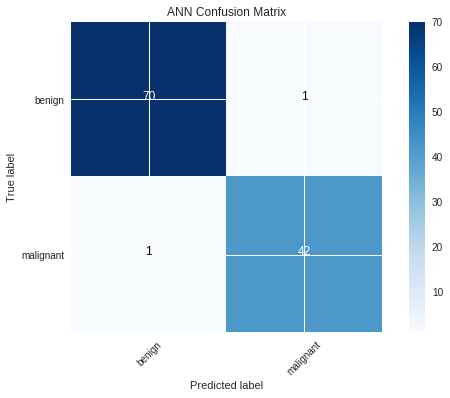

In [88]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot non-normalized confusion matrix
class_names = ['benign', 'malignant']

plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='ANN Confusion Matrix')


plt.show()

In [89]:
((cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])) * 100

98.24561403508771